In [1]:
import pandas as pd
import numpy as np
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('input_data.csv',encoding='utf8',header='infer')

In [3]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [5]:
df.groupby("Assignment group").count()

,Short description,Description,Caller
Assignment group,,,
GRP_0,3975,3975,3976
GRP_1,31,31,31
GRP_10,140,140,140
GRP_11,30,30,30
GRP_12,257,257,257
GRP_13,145,145,145
GRP_14,118,118,118
GRP_15,39,39,39
GRP_16,85,85,85


In [6]:
df["Description"] = df["Description"].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8498 non-null object
Description          8500 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.7+ KB


In [8]:
df.shape

(8500, 4)

### Check the Presence of Missing Values in dataset

In [9]:
df.isnull().values.any() 

True

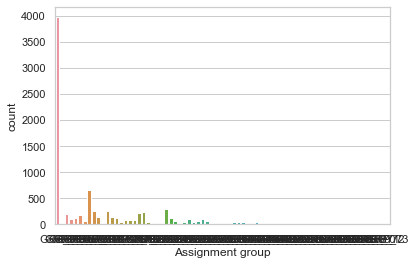

In [10]:
sns.countplot(df['Assignment group'])

## Lower Text

In [11]:
df["Description_lower"] = df["Description"].str.lower()
df.head()


,Short description,Description,Caller,Assignment group,Description_lower
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


## Number of Words

In [ ]:
df["Description_nwords"] = df["Description"].apply(lambda x: len(str(x).split(" ")))

## Removal of Punctuations

In [12]:
# drop the new column created in last cell
#df.drop(["Description_lower"], axis=1, inplace=True)

#PUNCT_TO_REMOVE = string.punctuation
#PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`'
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-/;<=>?[\\]^{|}~`'
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Description_wo_punct"] = df["Description"].apply(lambda text: remove_punctuation(text))
df.head()

,Short description,Description,Caller,Assignment group,Description_lower,Description_wo_punct
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user details.employee manager name\r...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


## Removal of Stopwords

In [13]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [14]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Description_wo_stop"] = df["Description_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,Short description,Description,Caller,Assignment group,Description_lower,Description_wo_punct,Description_wo_stop
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user details.employee manager name\r...,verified user details.employee manager name ch...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,received from: hmjdrvpb.komuaywn@gmail.com hel...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,received from: eylqgodm.ybqkwiam@gmail.com hi ...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,unable access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error


## Lemmatization

In [ ]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["Description_lemmatized"] = df["Description_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()


In [97]:
print(df["Description"][0])
print(df["Description_wo_stop"][0])

-verified user details.(employee# & manager name)
-checked the user name in ad and reset the password.
-advised the user to login and check.
-caller confirmed that he was able to login.
-issue resolved.
verified user details.employee  manager name
checked the user name in ad and reset the password.
advised the user to login and check.
caller confirmed that he was able to login.
issue resolved.


In [98]:
print(df["Description"][1])
print(df["Description_wo_stop"][1])



received from: hmjdrvpb.komuaywn@gmail.com

hello team,

my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?

kind 


received from: hmjdrvpb.komuaywn@gmail.com

hello team

my meetingsskype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this

kind 


In [100]:
print(df["Description"][2])
print(df["Description_wo_stop"][2])



received from: eylqgodm.ybqkwiam@gmail.com

hi

i cannot log on to vpn

best 
received from: eylqgodm.ybqkwiam@gmail.com hi cannot log vpn best


In [91]:
print(df["Description"][3])
print(df["Description_wo_stop"][3])

unable to access hr_tool page
unable to access hr_tool page


In [99]:
print(df["Description"][540])
print('\r\n')
print(df["Description_wo_stop"][540])

name:dctvfjrn oypnxftq
language:
browser:microsoft internet explorer
email:dctvfjrn.oypnxftq@gmail.com
customer number:
telephone:
summary:reset the password for aolhgbps pbxqtcek uacyltoe hxgayczemii8


name:dctvfjrn oypnxftq language: browser:microsoft internet explorer email:dctvfjrn.oypnxftq@gmail.com customer number: telephone: summary:reset password aolhgbps pbxqtcek uacyltoe hxgayczemii8


In [94]:
print(df["Description"][8000])
print('\r\n')
print(df["Description_wo_punct"][8000])

received from: monitoring_tool@company.com

 abended job in job_scheduler: bkbackup_tool_HostName_770_prod_inc at 08/09/16 12:56:26


received from: monitoring_tool@company.com

 abended job in job_scheduler: bkbackup_tool_HostName_770_prod_inc at 080916 12:56:26
